# Homework 1 Code and Report
AUFAR Rezka and LASBLEIS Alexandre 

### Step 1 : Simulate Rankings of Relevance for E and P (5 points)

In the first step you will generate pair s of rankings of relevance, for the production P and experimental E,
respectively, for a hypothetical query q . Assume a 3-graded relevance, i.e. {N, R, HR}. Construct all
possible P and E ranking pairs of length 5, for which E outperforms P.

Example:<br>
P: {N N N N N}<br>
E: {N N N N R}<br>
… <br>
P: {HR HR HR HR R}<br>
E: {HR HR HR HR HR}<br>

(Note 1: If you do not have enough computational power, sample 1000 pair uniformly at random to show
your work.)
##### Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from scipy.stats import bernoulli

In [2]:
#convert int to relevance
#_list : list of integer to be converted
#return : list of string where every integer has been replaced by its relevance interpretation
def to_string(_list): 
    L=[]
    for i in _list:
        if i==0:
            L.append("N ")
        elif i==1:
            L.append("R ")
        elif i==2:
            L.append("HR")
        else: 
            L.append("? ")
    return L

In [3]:
pairs = [] #variable used to store all pairs 
Ps = []
Es = []

#Create all combinaison for P, there are 3^5 = 243 possibilities since P is of length 5 and each member have 3 possible values:
# 0 (representing "N" ), 1 (representing "R), 2 (representing "HR)
for p_possibility in range(243): 
    P=[None]*5
    #create all five values for P 
    for p_pos in range(5):
        P[p_pos]= p_possibility // (np.power(3,p_pos)) %3 #formula to create all combinaison
    #we do the same for E    
    for e_possibility in range(243): 
        E=[None]*5
        for e_pos in range(5):
            E[e_pos]= e_possibility // (np.power(3,e_pos)) %3 #formula to create all combinaison
        pairs.append((P,E)) #adding the pair since every pair is valid
        #Memorize all created Es but only once
        if p_possibility==0:
            Es.append(E)
        #memorize all created Ps
    Ps.append(P)

In [4]:
#TESTING
print(len(pairs)) #= 59049 which is equal to the expected length = 3 ^10 = 59049
#print(pairs) #print all pairs but this takes a lot of place

#print a random pair to show that it makes sense 
r = rand.randint(0,59049-1)
print("P: " , to_string(pairs[r][0]), "E: ",to_string(pairs[r][1]))

#check if Es is as expected 
print(len(Es))#expect 243 = 3^5 
print(Es)

59049
('P: ', ['HR', 'R ', 'HR', 'HR', 'HR'], 'E: ', ['HR', 'HR', 'N ', 'HR', 'R '])
243
[[0, 0, 0, 0, 0], [1, 0, 0, 0, 0], [2, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0], [2, 1, 0, 0, 0], [0, 2, 0, 0, 0], [1, 2, 0, 0, 0], [2, 2, 0, 0, 0], [0, 0, 1, 0, 0], [1, 0, 1, 0, 0], [2, 0, 1, 0, 0], [0, 1, 1, 0, 0], [1, 1, 1, 0, 0], [2, 1, 1, 0, 0], [0, 2, 1, 0, 0], [1, 2, 1, 0, 0], [2, 2, 1, 0, 0], [0, 0, 2, 0, 0], [1, 0, 2, 0, 0], [2, 0, 2, 0, 0], [0, 1, 2, 0, 0], [1, 1, 2, 0, 0], [2, 1, 2, 0, 0], [0, 2, 2, 0, 0], [1, 2, 2, 0, 0], [2, 2, 2, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 1, 0], [2, 0, 0, 1, 0], [0, 1, 0, 1, 0], [1, 1, 0, 1, 0], [2, 1, 0, 1, 0], [0, 2, 0, 1, 0], [1, 2, 0, 1, 0], [2, 2, 0, 1, 0], [0, 0, 1, 1, 0], [1, 0, 1, 1, 0], [2, 0, 1, 1, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0], [2, 1, 1, 1, 0], [0, 2, 1, 1, 0], [1, 2, 1, 1, 0], [2, 2, 1, 1, 0], [0, 0, 2, 1, 0], [1, 0, 2, 1, 0], [2, 0, 2, 1, 0], [0, 1, 2, 1, 0], [1, 1, 2, 1, 0], [2, 1, 2, 1, 0], [0, 2, 2, 1, 0], [1, 2, 2, 1, 0], [2, 2, 2,

##### Explanations
In order to contruct all possible pairs of P and E with a 3-graded relevance {N, R, HR}, we first encode those relevance as integers: <br>
* 0 for N <br>
* 1 for R <br>
* 2 for HR <br>
This encoding allows us to do easy comparison between elements.
Then we created all pairs using this formula : $value = \frac{possibility}{3^{pos}} [3]$ with $possibility \in \{0,...,243\}$ and $ pos \in \{0,1,2,3,4\}$.

This give the following sequence depending on the position of the element in the list: <br>
* 0: $\{0,1,2,0,1,2,0,1,2,0,1,2...\}$
* 1: $\{0,0,0,1,1,1,2,2,2,0,0,0...\}$
* 2: $\{0,0,0,0,0,0,0,0,0,1,1,1,...\}$
* ... and so on

This formula is then used for the production P and the experiment E. 

##### Analysis
According to the formula we showed before, we should find all the possible combination. Futhermore, the number of pairs found is equal to the one we expected $3^{10}$ and the number of E and P are $3^{5}$ each which is also what is expected. 


### Step 2 : Implement Evaluation Measures (15 points)

Implement 1 binary and 2 multi-graded evaluation measures out of the 7 measures mentioned above.

(Note 2: Some of the aforementioned measures require the total number of relevant and highly relevant
documents in the entire collection – pay extra attention on how to find this)

##### code

In [5]:
#TODO: Remove for evaluation 

#Recall at rank k 
def Binary_measure_recal(test_set, r):
    num_test_rel = 0 
    total_num_rel=0
    for i in range(len(test_set)):
        if test_set[i]>0:
            if i<r:
                num_test_rel+=1
            total_num_rel+=1
    return float(num_test_rel) / total_num_rel

#Average precision at rank k 
def Binary_measure_avg_precision(test_set, r):
    num_rel=0
    sum_precision = 0 
    total_num_rel=0
    temp="("
    for i in range(len(test_set)):
        if test_set[i]>0:
            if i<r:
                num_rel+=1
                temp+=" "+str(num_rel)+"/"+str(i+1)+"+"
                sum_precision+=float(num_rel)/(i+1)
            total_num_rel+=1
    temp=temp[:len(temp)-1]+")"
    #print(temp,"/",total_num_rel)
    return float(sum_precision) / total_num_rel
#Normalized discount cumulative gain nDCG at rank r
def nDCG(test_set, r):
    orderedSet= list(test_set)
    orderedSet.sort(reverse=True)
    return DCG(test_set, r) / DCG(orderedSet, r)

In [6]:
#BINARY 
#Precision at rank r 
#test_set: the collection to be tested 
#r: the rank for which we test the collection 
#return : the precision 
def Binary_measure_precision(test_set, r):
    assert r <= len(test_set)
    assert r!= 0
    num_test_rel = 0 
    for i in range(r):
        #According to our notation, if test_set[i]>0, the document is relevant
        if test_set[i]>0:
            num_test_rel+=1
    return float(num_test_rel) / r #precision is number of relevant doc/ number of doc considered

#MULTI GRADED 
#Discount cumulative gain DCG at rank r
#test_set: the collection to be tested 
#r: the rank for which we test the collection 
#return : the gain 
def DCG(test_set, r):
    assert r <= len(test_set)
    assert r!= 0
    res=0
    for k in range(1,r+1):#r is the rank so it starts at 1
        rel_r = test_set[k-1]#index of element = rank -1 since rank starts at 1 and index at 0
        res+=float(np.power(2,rel_r)-1)/(np.log2(1+k))
    return res

#Rank Biased Precision w ith persistence parameter 𝜃 =0.8
#test_set: the collection to be tested 
#theta: the theta parameter of the RBP formula
#return : the precision
def RBP (test_set,theta=0.8):
    res=0
    for k in range(1,len(test_set)+1):
        rel_k=test_set[k-1]
        res+= rel_k * np.power(theta,k-1) * (1.0-theta)
    return res
        

In [7]:
#TESTING
test=        [1,0,2,5,0,1,0,0,0,1]#length 10
test_perfect=[5,2,1,1,1,0,0,0,0,0]
test_worst=  [0,0,0,0,0,1,1,1,2,5]

#The following results are rounded in order to make them readable
#Specific ordering 
print("Specific ordering")
for r in range(1,len(test)+1):
    print('Rank = ' , r,'Precision',round(Binary_measure_precision(test,r),3),'DCG', round(DCG(test,r),3),
          'RBP', round(RBP(test),3))

#Perfect ordering 
print("\nPerfect ordering")
for r in range(1,len(test_perfect)+1):
    print('Rank = ' , r,'Precision',round(Binary_measure_precision(test_perfect,r),3),'DCG', round(DCG(test_perfect,r),3),
          'RBP', round(RBP(test_perfect),3))

#Worst ordering 
print("\nWorst ordering")
for r in range(1,len(test_worst)+1):
    print('Rank = ' , r,'Precision',round(Binary_measure_precision(test_worst,r),3),'DCG', round(DCG(test_worst,r),3),
          'RBP', round(RBP(test_worst),3))

Specific ordering
('Rank = ', 1, 'Precision', 1.0, 'DCG', 1.0, 'RBP', 1.06)
('Rank = ', 2, 'Precision', 0.5, 'DCG', 1.0, 'RBP', 1.06)
('Rank = ', 3, 'Precision', 0.667, 'DCG', 2.5, 'RBP', 1.06)
('Rank = ', 4, 'Precision', 0.75, 'DCG', 15.851, 'RBP', 1.06)
('Rank = ', 5, 'Precision', 0.6, 'DCG', 15.851, 'RBP', 1.06)
('Rank = ', 6, 'Precision', 0.667, 'DCG', 16.207, 'RBP', 1.06)
('Rank = ', 7, 'Precision', 0.571, 'DCG', 16.207, 'RBP', 1.06)
('Rank = ', 8, 'Precision', 0.5, 'DCG', 16.207, 'RBP', 1.06)
('Rank = ', 9, 'Precision', 0.444, 'DCG', 16.207, 'RBP', 1.06)
('Rank = ', 10, 'Precision', 0.5, 'DCG', 16.496, 'RBP', 1.06)

Perfect ordering
('Rank = ', 1, 'Precision', 1.0, 'DCG', 31.0, 'RBP', 1.632)
('Rank = ', 2, 'Precision', 1.0, 'DCG', 32.893, 'RBP', 1.632)
('Rank = ', 3, 'Precision', 1.0, 'DCG', 33.393, 'RBP', 1.632)
('Rank = ', 4, 'Precision', 1.0, 'DCG', 33.823, 'RBP', 1.632)
('Rank = ', 5, 'Precision', 1.0, 'DCG', 34.21, 'RBP', 1.632)
('Rank = ', 6, 'Precision', 0.833, 'DCG', 34.2

##### Explanations
For Precision and DCG, we need to ensure that rank k does not exceed the documents length, and k cannot be zero.<br>
For DCG and RBP, we also decided that the value of the relevant would be equal to the value at that rank in the list. For example if an example is extremely relevant, he might get a value of 5 (as in the example) which leads to higher gain in DCG than a document which is only highly relevant (value of 2).<br>
Otherwise our implementation follows the definition of the method. 

##### Analysis
The result for Precision is highly dependant on the number of non-relevant in the cut-off collection. As k increases, the more non-relevant exists in the cut-off, the lower the precision will be. If we consider a rank equal to the length of the list, the precision is the same whatever the order is. Precision does not that into account how good the relevance of a document is, it only cares if a document is relevant or not. 

For DCG, the result depends on the degree of the relevance and the order of it. If the highest relevant score exists in the first position of the cut-off, the higher DCG will be. We showed that by displaying the DCG score with perfect ordering which is higher at any rank than the "specific ordering". Those value may be hard to use to compare different collections due to the fact that it is sensitive to the degree of relevance. A way to cope with that problem is to use its alternative version: the nDCG (normalized version). 

For RBP, we disregard rank and therefore we have the same result no matter the rank is. This measure pays great attention to the ordering as shown above: the best score is obtained with a perfect ordering whereas the worst one is obtained with the worst ordering. The model behind RBP considers that when you see a document, you have a probability to see the next document otherwise you stop. This model can be improved by taking into account how relevant is the document that we are looking at. Depending on this relevance, there is a probability to see the next document or to stop. This second model is called ERR model.



### Step 3 : Calculate the measure (5 points)

For the three measures and all P and E ranking pairs constructed above calculate the difference: 𝛥measure
= measure E -measure P . Consider only those pairs for which E outperforms P.

##### code

In [8]:
#Evaluate if E outperfoms P with respect to a specific measure. 
#methond_name: the measure used to test. It can be "precision", "DCG" or "RBP"
#E: 
#P:
#rank: 
#return : (outperforms, delta measure) where outperforms is True if E outperfors P with respect to the measure method for the
#rank and delta measure is the difference between to measure of E and P for the measure method.
def outperforms(methond_name,E,P,rank):
    if methond_name=="precision":
        delta = Binary_measure_precision(E,rank)-Binary_measure_precision(P,rank)
        return (delta>0), delta 
    elif methond_name=="DCG":
        delta=DCG(E,rank)-DCG(P,rank)
        return (delta>0), delta 
    elif methond_name=="RBP":
        delta=RBP(E)-RBP(P)
        return (delta>0), delta 

#variable for precision measure 
outperf_pairs_prec=[] #memorize pairs for which E outperfoms P
pairs_set_prec = [] 
d_measure_prec=[] #memorize "measure(E)-measure(P)" for which E outperfoms P

#variable for DCG measure 
outperf_pairs_DCG=[] #memorize pairs for which E outperfoms P
pairs_set_DCG = []
d_measure_DCG=[] #memorize "measure(E)-measure(P)" for which E outperfoms P

#variable for RBP measure
outperf_pairs_RBP=[] #memorize pairs for which E outperfoms P
pairs_set_RBP = []
d_measure_RBP=[] #memorize "measure(E)-measure(P)" for which E outperfoms P

rank = 4
for i in range(len(pairs)):#pairs made of (P,E)
    #test if E outperforms P with respect to a specific method
    outperforms_prec,delta_prec= outperforms("precision",pairs[i][1],pairs[i][0],rank)
    outperforms_DCG,delta_DCG= outperforms("DCG",pairs[i][1],pairs[i][0],rank)
    outperforms_RBP,delta_RBP= outperforms("RBP",pairs[i][1],pairs[i][0],rank)

    #Memorize some "precision" information only if E outperfom P
    if(outperforms_prec):
        outperf_pairs_prec.append(pairs[i])
        temp = pairs[i][1] + pairs[i][0]
        pairs_set_prec.append(''.join(str(x) for x in temp))
        d_measure_prec.append(delta_prec)
    
    #Memorize some "DCG" information only if E outperfom P
    if(outperforms_DCG):
        outperf_pairs_DCG.append(pairs[i])
        temp = pairs[i][1] + pairs[i][0]
        pairs_set_DCG.append(''.join(str(x) for x in temp))
        d_measure_DCG.append(delta_DCG)
    
    #Memorize some "RBP" information only if E outperfom P
    if(outperforms_RBP):
        outperf_pairs_RBP.append(pairs[i])
        temp = pairs[i][1] + pairs[i][0]
        pairs_set_RBP.append(''.join(str(x) for x in temp))
        d_measure_RBP.append(delta_RBP)     


In [11]:
#TESTING

print ("Number of pairs for which E outperforms P for all three measures: ",len(set.intersection(set(pairs_set_prec), set(pairs_set_DCG), set(pairs_set_RBP))))
print ("Pair in precision and in DCG:",rand.sample(set.intersection(set(pairs_set_prec), set(pairs_set_DCG)),1))

# pick result that is in prec but is not in DCG
print ("Pair in precision and not in DCG:",rand.sample(set(pairs_set_prec) - set(pairs_set_DCG),1))
# pick result that is in DCG but is not in prec
print ("Pair in DCG and not in precision:",rand.sample(set(pairs_set_DCG) - set(pairs_set_prec),1))


Number of pairs for which E outperforms P for all three measures:  17184
Pair in precision and in DCG: ['1102100122']
Pair in precision and not in DCG: ['1111222102']
Pair in DCG and not in precision: ['2222212111']


In [9]:
#TESTING
pair_prec_not_DCG = [[1,1,1,1,2],[2,2,1,0,2]] # pair E, P 
pair_DCG_not_prec = [[2,2,2,2,2],[1,2,1,1,1]] # pair E, P 
print("Pair in precision and not in DCG:",pair_prec_not_DCG, "precision E:",
      Binary_measure_precision(pair_prec_not_DCG[0],rank),"precision P:",
      Binary_measure_precision(pair_prec_not_DCG[1],rank),"DCG E: ",
     DCG(pair_prec_not_DCG[0],rank),"DCG P: ",
     DCG(pair_prec_not_DCG[1],rank) )

print("Pair in DCG and not in precision:",pair_DCG_not_prec, "DCG E: ",
     DCG(pair_DCG_not_prec[0],rank),"DCG P: ",
     DCG(pair_DCG_not_prec[1],rank),"precision E:",
      Binary_measure_precision(pair_DCG_not_prec[0],rank),"precision P:",
      Binary_measure_precision(pair_DCG_not_prec[1],rank))

('Pair in precision and not in DCG:', [[1, 1, 1, 1, 2], [2, 2, 1, 0, 2]], 'precision E:', 1.0, 'precision P:', 0.75, 'DCG E: ', 2.5616063116448506, 'DCG P: ', 5.3927892607143724)
('Pair in DCG and not in precision:', [[2, 2, 2, 2, 2], [1, 2, 1, 1, 1]], 'DCG E: ', 7.6848189349345519, 'DCG P: ', 3.8234658187877653, 'precision E:', 1.0, 'precision P:', 1.0)


##### Explanations
For precision, DCG, and RBP, we calculate the difference between all combination of E and P that we have generated in Step 1, then we append every difference that is greater than zero, which means that E outperforms P.
##### Analysis
For each three measures, we have different pairs in which E outperforms P. There are 17184 pairs where E outperforms P in all three measures. However, there exists some pairs where E outperforms P for one kind of measure, but not the other. <br> 
For example, E=[1,1,1,1,2] outperforms P=[2,2,1,0,2] in precision (delta of 0.25), but not in DCG (delta of -2.83118294971) . This is due to the fact that precision does not check order and the degree of relevance. The same happens the opposite way : E=[2,2,2,2,2] outperforms P=[1,2,1,1,1] in DCG (delta of 3.86135311614), but not in precision (delta of 0). <br>
This indicates that in real world application, it is important to implement different kinds of measure so we will have broader feedback to optimize the algorithm.

## Step 4 : Implement Interleave (15 points)

Implement 2 interleaving algorithms: (1) Team-Draft Interleaving OR Balanced Interleaving, AND (2),
Probabilistic Interleaving. The interleaving algorithms should (a) given two rankings of relevance
interleave them into a single ranking, and (b) given the users clicks on the interleaved ranking assign
credit to the algorithms that produced the rankings.

##### code

In [9]:
# assignment assumption : E and P always return different documents
# general parameter : consider two pairs can contain same documents 

# Implements team draft interleaving. There are two mode in this method, general or specific to this assignment
# parameters : ranking_pairs, and boolean to determine if its general case or not
# return : an interleaved list of tuples that contains relevance labels and its document source
# return : a relevance labels
def team_draft_interleave(ranking_pairs, general=False):
    # interleave two list
    interleaved_list = []
    relevance_list = []
    added_list = []
    first_index=0
    second_index=0
    # if both documents still have an element
    while((not first_index==len(ranking_pairs[0])) or (not second_index==len(ranking_pairs[1]))):
        # toss a coin to determine which documents is picked first
        coin = rand.choice([0,1])
        first_link = "E" if (coin==0) else "P"
        second_link = "P" if (coin==0) else "E"
        
        coin_first = first_index if (coin==0) else second_index
        coin_second = second_index if (coin==0) else first_index
        # if it's general case, picked every documents randomly. If either E or P contains element that was 
        # already in the interleaved list, pick the next element. This ensure that the interleaved list has
        # a balanced proportion of document.
        # in this general case, we treat elements in E and P as a documents id, not relevance labels 
        if(general):
            while ((not coin_first==len(ranking_pairs[coin])) and (ranking_pairs[coin][coin_first] in added_list)):
                coin_first+=1
            if (not coin_first==len(ranking_pairs[coin])):    
                interleaved_list.append((ranking_pairs[coin][coin_first], first_link))
                added_list.append(ranking_pairs[coin][coin_first])
            
            while ((not coin_second==len(ranking_pairs[1-coin])) and (ranking_pairs[1-coin][coin_second] in added_list)):
                coin_second+=1
            
            if (not coin_second==len(ranking_pairs[1-coin])):    
                interleaved_list.append((ranking_pairs[1-coin][coin_second],second_link))
                added_list.append(ranking_pairs[1-coin][coin_second])
        # if this is not general (E and P always returns different documents, E and P contains relevance labels)
        # then append as usual
        if(not general):
            interleaved_list.append((ranking_pairs[coin][first_index], first_link))
            interleaved_list.append((ranking_pairs[1-coin][second_index], second_link))
            relevance_list.append(ranking_pairs[coin][first_index])
            relevance_list.append(ranking_pairs[1-coin][second_index])
            
        first_index+=1
        second_index+=1

    return interleaved_list, relevance_list

In [10]:
# TESTING
# Note that this is not a general interleave test. The interleaved list contains relevance labels
test_result = team_draft_interleave(pairs[r])
print test_result[0]
print "Interleaved List : " + str(test_result[1])

[(1, 'P'), (0, 'E'), (0, 'P'), (0, 'E'), (0, 'E'), (1, 'P'), (0, 'E'), (0, 'P'), (0, 'E'), (0, 'P')]
Interleaved List : [1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [11]:
# TESTING
# tested with general case, which E and P can contain same link
# Note that this is a general interleave test. The interleaved list contains a document ids
general_test = ([1,2,3,4,5], [1,2,3,4,5])
test_result = team_draft_interleave(general_test, True)
print "Interleaved List General : " + str(test_result)

Interleaved List General : ([(1, 'P'), (2, 'E'), (3, 'P'), (4, 'E'), (5, 'E')], [])


In [12]:
# TESTING
# tested the result with existing library (https://github.com/mpkato/interleaving/tree/master/interleaving)
# HAVE TO INSTALL FIRST BEFORE USING IMPORT INTERLEAVING

import interleaving
a = [1, 2, 3, 4, 5] # Ranking 1
b = [1, 2, 3, 4, 5] # Ranking 2
method = interleaving.TeamDraft([a, b]) # initialize an interleaving method
ranking = method.interleave() # interleaving
print (ranking)

clicks = [0, 3] # observed clicks, i.e. documents 1 and 2 are clicked
result = interleaving.TeamDraft.evaluate(ranking, clicks)
print (result) # (0, 1) indicates Ranking 1 won Ranking 2, vice versa.

[1, 2, 3, 4, 5]
[]


In [13]:
import copy

# Implements softmax function. This function returns the probability of a documents being picked that is
# proportional to its rank. Use hyperparameters tau = 3 (Hofmann, 2011)
# parameters : tau and length of a document
# return : probability distribution
def softmax(tau, length):
    total_denominator = 0
    softmax_distribution = []
    # calculate the denominator
    for i in range(1, length+1):
        total_denominator += float(1.0/np.power(i,tau))
    # calculate the softmax distribution of a given documents length
    for i in range(1, length+1):
        softmax_distribution.append(float(1.0/np.power(i,tau) / (total_denominator)))
    return softmax_distribution

# Implements probabilistic_interleave.
# parameters : ranking_pairs (E and P)
# return : an interleaved list of tuples that contains relevance labels and its document source
# return : a relevance labels
def probabilistic_interleave(ranking_pairs):
    assert len(ranking_pairs[0]) ==  len(ranking_pairs[1])
    E = copy.copy(ranking_pairs[0])
    P = copy.copy(ranking_pairs[1])
    # generate softmax probability distribution with tau = 3 (Hofmann, 2011)
    softmax_distribution_E = softmax(3,len(E))
    softmax_distribution_P = softmax(3,len(P))
    # interleave two list with softmax probability distribution
    interleaved_list = []
    relevance_list = []
    for _ in range(len(E) + len(P)):
        coin = rand.choice([0,1])
        if(coin == 0):
            # check if E is empty then just sample from P
            if not E:
                # choose element from P randomly
                picked = np.random.choice(P, 1, p=softmax_distribution_P)[0]
                # append it to interleaved list
                interleaved_list.append((picked, "P"))
                relevance_list.append(picked)
                # remove the picked element
                P.remove(picked)
                # renormalize the distribution
                softmax_distribution_P = softmax(3,len(P))
            # else sample from E
            else:
                # choose element from E randomly
                picked = np.random.choice(E, 1, p=softmax_distribution_E)[0]
                # append it to interleaved list
                interleaved_list.append((picked, "E"))
                relevance_list.append(picked)
                # remove the picked element
                E.remove(picked)
                # renormalize the distribution
                softmax_distribution_E = softmax(3,len(E))
        if(coin == 1):
            # check if P is empty then just sample from E
            if not P:
                # choose element from E randomly
                picked = np.random.choice(E, 1, p=softmax_distribution_E)[0]
                # append it to interleaved list
                interleaved_list.append((picked, "E"))
                relevance_list.append(picked)
                # remove the picked element
                E.remove(picked)
                # renormalize the distribution
                softmax_distribution_E = softmax(3,len(E))
            # else sample from P
            else:
                # choose element from P randomly
                picked = np.random.choice(P, 1, p=softmax_distribution_P)[0]
                # append it to interleaved list
                interleaved_list.append((picked, "P"))
                relevance_list.append(picked)
                # remove the picked element
                P.remove(picked)
                # renormalize the distribution
                softmax_distribution_P = softmax(3,len(P))
    # generate user clicks randomly
    return interleaved_list, relevance_list

In [14]:
r = rand.randint(0,59049-1)

In [15]:
# counts the number of clicks in the interleaved list to determine which algorithm wins
def who_wins(interleaved_list, clicks):
    # calculate scores
    E_wins, P_wins = 0, 0
    for i, click in enumerate(clicks):
        if click == 1:
            if interleaved_list[i][1] == "E":
                E_wins += 1
            if interleaved_list[i][1] == "P":
                P_wins += 1
    if E_wins > P_wins:
        return "E win"
    elif E_wins < P_wins:
        return "P Win"
    else:
        return "tie"

In [16]:
# TESTING
# This is a test to see a different results from team draft interleave and probabilistic interleave with
# the sampe document pair

click_test = [1,1,0,0,1,0,0,0,0,0]
pair_test = ([2, 1, 0, 0, 1], [1, 2, 0, 2, 2])
td_interleaved = team_draft_interleave(pair_test, False)
prob_interleaved = probabilistic_interleave(pair_test)
print pair_test
print td_interleaved
print prob_interleaved
print who_wins(td_interleaved[0], click_test)
print who_wins(prob_interleaved[0], click_test)

([2, 1, 0, 0, 1], [1, 2, 0, 2, 2])
([(2, 'E'), (1, 'P'), (1, 'E'), (2, 'P'), (0, 'E'), (0, 'P'), (0, 'E'), (2, 'P'), (1, 'E'), (2, 'P')], [2, 1, 1, 2, 0, 0, 0, 2, 1, 2])
([(2, 'E'), (1, 'E'), (0, 'E'), (1, 'P'), (0, 'E'), (1, 'E'), (2, 'P'), (0, 'P'), (2, 'P'), (2, 'P')], [2, 1, 0, 1, 0, 1, 2, 0, 2, 2])
E win
E win


##### Explanations
For probabilistic interleave, we implement a softmax function that creates a probability distribution of elements in a document to be picked for interleaved list. The probability of the element is inversely proportional to its rank in a document. The formula is :

$\frac{\frac{1}{r_x(d)^\tau}}{\sum_{d=1}^D \frac{1}{r_x(d)^\tau}} $

where d is a element in a documents. Tau is a hyperparameter, and is set to 3 (Hofmann, 2011)

To determine which algorithm wins, we count the total element that is clicked originated from E or P. Whichever has more counts, wins.
##### Analysis
Both interleave method, team draft and probabilistic, yield a different result if applied to certain ranking pairs. Also, due to the randomness that is introduced by the coin toss, each interleave method do have a chance to yield different interleaved list on the same ranking pairs if it is run for more than one time. <br>
The cell above generate different outcome if run more than one. Sometimes E win, and sometimes P win. 

## Step 5 : Implement User Clicks Simulation ( 25 points)

Having interleaved all the ranking pairs an online experiment could be ran. However, given that we do not
have any users (and the entire homework is a big simulation) we will simulate user clicks.<br>
We have considered a number of click models including:<br>
* 1. Random Click Model (RCM)
* 2. Position-Based Model (PBM)
* 3. Simple Dependent Click Model (SDCM)
* 4. Simple Dynamic Bayesian Network (SDBN)

Consider two different click models, (a) the Random Click Model (RCM), and (b) one out of the
remaining 3 aforementioned models. The parameters of some of these models can be estimated using the
Maximum Likelihood Estimation (MLE) method, while others require using the
Expectation-Maximization (EM) method. Implement the two models so that:
* (a) there is a method that learns the parameters of the model given a set of training data, 
* (b) there is a method that predicts the click probability given a ranked list of relevance labels, 
* (c) there is a method that decides - stochastically -whether a document is clicked based on these probabilities.<br>

Having implemented the two click models, estimate the model parameters using the Yandex Click Log

##### code

In [17]:
#Random Click Model (RCM) 

#Learns the parameter rho of the RCM model given a set of training data
#training_data: The set of training data in the format of list of user action 
#return: the learned parameter rho
def learns_param_RCM(training_data):
    numb_doc = 0
    num_click=0
    for data in training_data:
        #Only if the action is a query, we add to the total number of doc the number of doc returned by the query
        if("Q" in data[2]):
            for j in range(5,len(data)):
                numb_doc+=1
        #If the action is a click, we add one to the total number of click 
        if("C" in data[2]):
            num_click+=1
    return float(num_click)/numb_doc

#Predicts the click probability given a ranked list of relevance labels
#training_data: The set of training data in the format of list of user action 
#relevance_labels: A list of relevance labels (as integer) for the collection
#return: A list of click probabilty (one probabilty per document)
def predict_click_proba_RCM(training_data,relevance_labels) :
    rho = learns_param_RCM(training_data)
    #since the probability is rho for every document, 
    #we return a list of rho that has the length of the relevance labels list
    return [rho]*len(relevance_labels)

#Decides - stochastically -whether a document is clicked based on these probabilities
#training_data: The set of training data in the format of list of user action 
#relevance_labels: A list of relevance labels (as integer) for the collection
#document: The index of the document 
#return: A list of click probabilty (one probabilty per document)
def is_doc_clicked_RCM(training_data,relevance_labels,document):
    proba_distrib = predict_click_proba_RCM(training_data,relevance_labels)
    return (bernoulli.rvs(proba_distrib[document])==1)

def generate_click_RCM(training_data, interleaved_list):
    click = []
    proba_distrib = predict_click_proba_RCM(training_data,relevance_labels)
    for i, elem in enumerate(proba_distrib):
        click.append(bernoulli.rvs(elem))
    return click

#Simple Dynamic Bayesian Network (SDBN)

#Add one to a dictionnary entry and create it if it doesn't exists
#key: The key for which we want to add one in the dictionnary
#dictionnary: 
#return: None
def add1(key,dictionnary):
    if key not in dictionnary:
        dictionnary[key]=1
    else:
        dictionnary[key]+=1

#Learns the parameter attractiveness and satisfaction of the SBDN model given a set of training data
#training_data: The set of training data in the format of list of user action 
#return: the learned parameters attractiveness and satisfaction
def learns_param_SBDN(training_data):
    #the number of times document u is presented as response for the query q : used to calculate attrativness
    doc_presented_q_dict= {}
    #the number of times document u is clicked for the query q: used to calculate attrativness and satisfaction
    doc_clicked_q_dict= {}
    #the number of times document u is the last clicked for the query q: used to calculate satisfaction
    doc_last_clicked_q_dict= {}
    
    global_index = 0 #index used to browser training_data
    for session in range(int(training_data[len(training_data)-1][0])):
        #index used to browser all the documents in a session
        i=0 
        end_of_session=False
        #memorise the last query id
        last_query =-1
        #loop to browser the current session
        while(not end_of_session):
            #the session stop if the next index is not equal to the current session index or we reach the end of the list
            if not (global_index+i+1)>= len(training_data):
                end_of_session=(not int(training_data[global_index+i+1][0]) == session)
            else:
                end_of_session=True
                
            #memorize the current element for efficency reasons
            element = training_data[global_index+i]
            #memorize the last query
            if(element[2]=='Q'):
                last_query=int(element[3])
                #memorize that a document appears for a query
                for j in range(5,len(element)):
                    key= (int(element[j]),last_query)
                    add1(key,doc_presented_q_dict)
            #memorize the click
            if(element[2]=='C'):
                key= (int(element[3]),last_query)
                #memorize in the click dictionnary 
                #REMOVE
                add1(key,doc_clicked_q_dict)
                #If this is the last click of a session: memorize in the last click dictionnary 
                #or that the next element is a query 
                if end_of_session or (training_data[global_index+i+1][2]=='Q'):
                    add1(key,doc_last_clicked_q_dict)
 
            #increment the index used to browser the session 
            i+=1
        #after the end of a session, skip to the next session
        global_index+=i
    
    attract= {}
    satisf = {}
    #calculate attractivness which is #u is clicked for query q / #u appears with q 
    for key in doc_presented_q_dict:
        if key in doc_clicked_q_dict:
            attract[key]= float(doc_clicked_q_dict[key]) /  doc_presented_q_dict[key]
        else: 
            attract[key]=0
    #calculate satisfaction which is #u is last clicked document for query q / #u is clicked for query q 
    for key in doc_clicked_q_dict:
        if key in doc_last_clicked_q_dict:
            satisf[key]= float(doc_last_clicked_q_dict[key]) /  doc_clicked_q_dict[key]
        else: 
            satisf[key]=0
    return attract,satisf

#Predicts the click probability given a ranked list of relevance labels
#training_data: The set of training data in the format of list of user action 
#relevance_labels: A list of relevance labels (as integer) for the collection
#doc_ids: The list of ids(with respect to the ids of the training data)  of the documents from the
         #referance list 
#query: The query id (with respect to the ids of the training data).
#return: A list of click probabilty (one probabilty per document)
def predict_click_proba_SBDN(training_data,relevance_labels,doc_ids,query) :
    attract,satisf= learns_param_SBDN(training_data)
    proba= [0]* len(relevance_labels)
    exam_proba=[0]*len(relevance_labels)
    
    for i in len(doc_ids):
        #try to get the attractiveness for the document i and the query 
        alpha_i_q = 0
        key = (doc_ids[i],query)
        if key in attract:
            alpha_i_q = attract[key]
        
        #try to get the satisfation for the document i and the query 
        sigma_i_q = 0 
        if key in satisf:
            sigma_i_q = satisf[key]
            
        #Check the text below to get how the probabilities and the the examination probability are updated
        if(i==0):
            proba[i]=alpha_i_q
            exam_proba[i]=1
        else :
            proba[i]=alpha_i_q * exam_proba[i-1]
            #gamma=1
            exam_proba[i]=exam_proba[i-1] * ( (1-sigma_i_q)*alpha_i_q + (1-alpha_i_q) )
    return proba

#Decides - stochastically -whether a document is clicked based on these probabilities
#training_data: The set of training data in the format of list of user action 
#relevance_labels: A list of relevance labels (as integer) for the collection
#doc_ids: The list of ids(with respect to the ids of the training data)  of the documents from the
         #referance list 
#query: The query id (with respect to the ids of the training data).
#document: The index of the document 
#return: A list of click probabilty (one probabilty per document)
def is_doc_clicked_SBDN(training_data,relevance_labels,doc_ids,query,document):
    proba_distrib= predict_click_proba_SBDN(training_data,relevance_labels,doc_ids,query)
    return (bernoulli.rvs(proba_distrib[document])==1)


In [18]:
#TESTING 

#open file and preprocess data
training_data=[]
relevance_labels= [2, 1, 2, 1, 1, 0, 2, 1, 2, 2]
document= 3

f= open("YandexRelPredChallenge.txt","r")
for line in f:
    #The format is a list of user action 
    training_data.append(line.split("\n")[0].split('\t'))
f.close()
print("Rho: ", learns_param_RCM(training_data))
attract, satisf= learns_param_SBDN(training_data)
#For testing SBDN, let's look at all the pairs of click/query for query 384 from the YandexRelPredChallenge.txt: 
keys = [(29,384),(89,384),(293,384),(394,384),(742,384),(867,384),(1167,384),(1653,384),(3474,384)
        ,(3494,384),(3501,384),(3558,384),(8293,384),(9217,384),(15393,384),(67395,384),(67409,384)]

#The following values have been determined by counting values from the YandexRelPredChallenge.txt. Those
#values are summarized in the Analysis part below
exp_attractiveness=[0,2.0/9.0,0,3.0/4.0,0,3.0/4.0,4.0/13.0,2.0/9.0,6.0/13.0,0,2.0/9.0,1.0/13.0,1.0/4.0,0,
                    3.0/4.0,1.0/4.0,1.0/4.0]
exp_satisfaction=[0,1.0,0,0,0,2.0/3.0,1.0/4.0,1.0/2.0,2.0/6.0,0,1.0/2.0,0,0,0,0,1.0,0]
#Display the results 
for i in range(len(keys)):
    key=keys[i]
    att= 0
    if key in attract:
        att=attract[key]
    sat= 0
    if key in satisf:
        sat= satisf[key]
    print("Key",key,"Expected (attract=",exp_attractiveness[i],"satis=",exp_satisfaction[i],") real: ",
          (att,sat))
    

('Rho: ', 0.13445559411047547)
('Key', (29, 384), 'Expected (attract=', 0, 'satis=', 0, ') real: ', (0, 0))
('Key', (89, 384), 'Expected (attract=', 0.2222222222222222, 'satis=', 1.0, ') real: ', (0.2222222222222222, 1.0))
('Key', (293, 384), 'Expected (attract=', 0, 'satis=', 0, ') real: ', (0, 0))
('Key', (394, 384), 'Expected (attract=', 0.75, 'satis=', 0, ') real: ', (0.75, 0))
('Key', (742, 384), 'Expected (attract=', 0, 'satis=', 0, ') real: ', (0, 0))
('Key', (867, 384), 'Expected (attract=', 0.75, 'satis=', 0.6666666666666666, ') real: ', (0.75, 0.6666666666666666))
('Key', (1167, 384), 'Expected (attract=', 0.3076923076923077, 'satis=', 0.25, ') real: ', (0.3076923076923077, 0.25))
('Key', (1653, 384), 'Expected (attract=', 0.2222222222222222, 'satis=', 0.5, ') real: ', (0.2222222222222222, 0.5))
('Key', (3474, 384), 'Expected (attract=', 0.46153846153846156, 'satis=', 0.3333333333333333, ') real: ', (0.46153846153846156, 0.3333333333333333))
('Key', (3494, 384), 'Expected (at

##### Explanations

For the RCM the learn parameter is calculated using the MLE. For this model, the probabilty of a click on a document is a constant always equal to the learned parameter $\rho$. Finally, we used a Bernouilly process to stochastically decide if a document is clicked or not. 

For the SCDN, the parameters are also estimated using MLE: <br>
$\alpha_{uq}=\frac{ number\ of\ document\ u\ clicked\ for\ query\ u}{ number\ of\ document\ u\ appears\ with\ query\ q} $ 

$\sigma_{uq}=\frac{ number\ of\ document\ u\ that\ where\ clicked\ last\ for\ query\ u}{ number\ of\ document\ u\ clicked\ for\ query\ u} $. In our code we assume that a user can only click once on a document per session for a given query

The formula then used to calculate the probability is: <br>
$P(C_u=1) = \alpha_{uq} \epsilon_{r_u} $ <br>
$\epsilon_{r+1}= \epsilon_{r}\gamma  [(1-\sigma_{uq})\alpha_{uq} +(1-\alpha_{uq})] $ with $\epsilon$ the estimation probability

Finally we also used a Bernouilly process to stochastically decide if a document is clicked or not. 

We ran into problems figuring out how to use the conditionnal click probabilty to build the click probability distribution since it requires to know if the previous documents where clicked or not. Since we are building a distribution, we don't know yet if the previous document will be clicked or not. We could also try to update the distribution every time the document is clicked but it then seems useless to have calculated the probability distribution since most of the values will be updated before being used. The formula to use to update the conditionnal probabilty is:<br>
$(P(C_u=1|C_{<r_u})= \alpha_{uq} \epsilon_{r_u}$

$\epsilon_{r+1}= c_r^{(s)}\gamma (1-\sigma_{u_r q}) + (1-c_r^{(s)}) \frac{(1-\alpha_{u_r q}) \epsilon_r \gamma}{1-\alpha_{u_r q}\epsilon_r}  $

For the attraction, we decided to calculate it via MLE in order to make those functions generic and accurate. 
##### Analysis
The parameter rho for RCM has a value of 0.13 after evaluation thanks to the YandexRelPredChallenge.txt file. This value makes sense since the value in the litterature is around 0.12.

For the SCDN parameters (attractiveness and satisfaction), as it is hard to see if those values make sense with fictive data, we decided to calculate them ourselves and then to compare with the computed values. We focused on the query 384 since it gave a decent number of examples with allows us to show that our code works well. Bellow are summarized the results we computed ourselves: 

 Query 384 (number:13)
 Url list : 3474	1653	3501	89	1167	3494	3558	742	293	29 (x9) <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;9217	1167	15393	394	867	3474	8293	67409	3558	67395 (x4)
* doc id: 29: appear:9, clicked:0 , last:0
* doc id: 89: appear:9, clicked:2 , last:2
* doc id: 293: appear:9, clicked:0 , last:0
* doc id: 394: appear:4, clicked:3 , last:0
* doc id: 742: appear:9, clicked:0 , last:0
* doc id: 867: appear:4, clicked:3 , last:2
* doc id: 1167: appear:13, clicked:4 , last:1 
* doc id: 1653: appear:9, clicked:2 , last:1
* doc id: 3474: appear:13, clicked:6 , last:2
* doc id: 3494: appear:9, clicked:0 , last:0
* doc id: 3501: appear:9, clicked:2 , last:1
* doc id: 3558: appear:13, clicked:1 , last:0
* doc id: 8293: appear:4, clicked:1 , last:0	
* doc id: 9217: appear:4, clicked:0 , last:0
* doc id: 15393: appear:4, clicked:3 , last:0
* doc id: 67395: appear:4, clicked:1 , last:1
* doc id: 67409: appear:4, clicked:1 , last:0	
 
We finally found that the results we estimated were the same as the results we calculated with our code.
 



## Step 6 : Simulate Interleaving Experiment ( 10 points)

Having implemented the click models, it is time to run the simulated experiment.<br>
For each of interleaved ranking run N simulations for each one of the click models implemented and
measure the proportion p of wins for E.<br>

(Note 7: Some of the models above include an attractiveness parameter $\alpha_{uq}$ . Use the relevance label to
assign this parameter by setting $\alpha_{uq}$ for a document u in the ranked list accordingly.)
##### code

In [19]:
#For our case, we have to redefined the attractivness(which depends now on the relevance) 
#and thus the previous functions of SBDN:

#Learns the parameter attractiveness and satisfaction of the SBDN model given a set of training data
#query: the query id we are considering with respect to the querys ids of the training data
#doc_ids: the document ids we are considering with respect to the documents ids of the training data
#return: the learned parameters attractiveness and satisfaction
def specific_learns_param_SBDN(training_data,relevance_labels,query,doc_ids):
    attract,satisf= learns_param_SBDN(training_data)
    #the previous attractivness is incorrect for our case: we have to calculate it using relevance labels: 
    #thanks to formula p47 of "Click Models for Web Search", we have for a query q:
    
    #relevance(u) = satisf(u) * attract(u) => attract(u) = relevance(u) / satisf(u)
    relev_attract=[0]*len(relevance_labels)
    for i in range(len(relevance_labels)):
        satisf_u = 0
        key = (doc_ids[i],query)
        if key in satisf:
            satisf_u = satisf[key]
        if satisf_u != 0:
            relev_attract[i]=relevance_labels[i]/satisf_u
        else:
            relev_attract[i] = -1 #will be replaced by max attractiveness
    relev_attract=normalize_attract(relev_attract)
    return relev_attract,satisf

def normalize_attract(attract):
    res=[0]*len(attract)
    max_value=max(attract)
    if(max_value == 0 ):
        return [0]*len(attract)
    else:
        for i in range(len(attract)):
            if(attract[i]==-1):
                res[i]=1
            else:
                res[i]=attract[i]/max_value
    return res
#Same function as previously instead that we use specific_learns_param_SBDN
def specific_predict_click_proba_SBDN(training_data,relevance_labels, query, doc_ids):
    attract,satisf= specific_learns_param_SBDN(training_data,relevance_labels, query, doc_ids)
    
    proba= [0]* len(relevance_labels)
    exam_proba=[0]*len(relevance_labels)
    
    for i in range(len(relevance_labels)):
        alpha_i_q = attract[i]
            
        sigma_i_q = 0 
        key = (doc_ids[i],query)
        if key in satisf:
            sigma_i_q = satisf[key]
        
        if(i==0):
            proba[i]=alpha_i_q
            exam_proba[i]=1
        else :
            proba[i]=alpha_i_q * exam_proba[i-1]
            #gamma=1
            exam_proba[i]=exam_proba[i-1] * ( (1-sigma_i_q)*alpha_i_q + (1-alpha_i_q) )
    return proba

#Same function as previously instead that we use specific_predict_click_proba_SBDN
def specific_is_doc_clicked_SBDN(training_data,relevance_labels,doc_ids,query,document):
    proba_distrib= specific_predict_click_proba_SBDN(training_data,relevance_labels,query,doc_ids)
    return (bernoulli.rvs(proba_distrib[document])==1)

#Generate the click for each document given the distribution probability 
def generate_click_SDBN(training_data, interleaved_list, query, doc_ids):
    click = []
    proba_distrib = specific_predict_click_proba_SBDN(training_data,relevance_labels, query, doc_ids)
    for i, elem in enumerate(proba_distrib):
        value = bernoulli.rvs(elem)
        click.append(value)
    return click

#TESTING 
query = 384
doc_ids_E = [89,867,1167,742,29] #satifaction: [1,2/3,1/4,0,0], mean satisfaction : ~2/5
doc_ids_P= [67395,3501,1653,3558,293] #satifaction: [1,1/2,1/2,0,0] mean satisfaction : =2/5
attractE,satisfE= specific_learns_param_SBDN(training_data,[1,2,0,2,1],query,doc_ids_E)
attractP,satisfP= specific_learns_param_SBDN(training_data,[1,2,0,2,1],query,doc_ids_P)

print("E attract: ", attractE)
print("P attract: ", attractP)

('E attract: ', [0.3333333333333333, 1.0, 0.0, 1, 1])
('P attract: ', [0.25, 1.0, 0.0, 1, 1])


In [20]:
#TESTING
N=100
test_pairs = rand.sample(pairs, N)

In [21]:
#TESTING
#For SBDN
query_test = 384
doc_ids_E = [89,867,1167,742,29] #satifaction: [1,2/3,1/4,0,0], mean satisfaction : ~2/5
doc_ids_P= [67395,3501,1653,3558,293] #satifaction: [1,1/2,1/2,0,0] mean satisfaction : =2/5
doc_ids_E2= [89,867,1167,67395,3501] #satifaction: [1,2/3,1/4,1,1/2]
doc_ids_P2= [9217,8293,3494,3558,293] #satifaction: [0,0,0,0,0]

#Takes and interleaved list of document and create the interleaved list of their ids.
def interleave_doc_ids(_doc_ids_E,_doc_ids_P,interleaved_list):
    doc_ids_interleaved= [] # the result list
    E_ind=0 #index to browser the E's document ids list
    P_ind=0 #index to browser the P's document ids list
    
    #Stop condition: reached the end of E AND P ids list s
    while((E_ind < len(_doc_ids_E)) or (P_ind < len(_doc_ids_P))):
        nb_elem= E_ind +P_ind # number of added elements in the result list 
        #Document comes from E 
        if interleaved_list[nb_elem][1]=='E':
            #look for an id that is not in the result list
            while( (E_ind < len(_doc_ids_E)) and (_doc_ids_E[E_ind] in doc_ids_interleaved)):
                 E_ind+=1
            #if there are some ids left, add one to the list 
            if(E_ind < len(_doc_ids_E)):
                doc_ids_interleaved.append(_doc_ids_E[E_ind])
                E_ind+=1
        #Document comes from P        
        elif interleaved_list[nb_elem][1]=='P':
            #look for an id that is not in the result list
            while( (P_ind < len(_doc_ids_P)) and (_doc_ids_P[P_ind] in doc_ids_interleaved)):
                P_ind+=1
            #if there are some ids left, add one to the list 
            if(P_ind < len(_doc_ids_P)):
                doc_ids_interleaved.append(_doc_ids_P[P_ind])
                P_ind+=1
    return doc_ids_interleaved

#TESTING
#E: [2, 1, 0, 0, 1] P: [1, 2, 0, 2, 2]
#([(2, 'E'), (1, 'P'), (1, 'E'), (2, 'P'), (0, 'P'), (0, 'E'), (2, 'P'), (0, 'E'), (1, 'E'), (2, 'P')], 
print(interleave_doc_ids(doc_ids_E,doc_ids_P,
        [(2, 'E'), (1, 'P'), (1, 'E'), (2, 'P'), (0, 'P'), (0, 'E'), (2, 'P'), (0, 'E'), (1, 'E'), (2, 'P')]))

[89, 67395, 867, 3501, 1653, 1167, 3558, 742, 29, 293]


In [22]:
#TESTING
# RCM simulation
def simulate(query,_doc_ids_E,_doc_ids_P):
    E_wins_proportion_td_RCM = 0
    E_wins_proportion_prob_RCM = 0
    tie_td_RCM = 0
    tie_prob_RCM = 0
    for i, elem in enumerate(test_pairs):
        #print(i,"%")
        team_draft_res = team_draft_interleave(elem, False)
        prob_res = probabilistic_interleave(elem)
        clicks_td_RCM = generate_click_RCM(training_data, team_draft_res[1])
        clicks_prob_RCM = generate_click_RCM(training_data, prob_res[1])
        if(who_wins(team_draft_res[0], clicks_td_RCM) == "E win"):
            E_wins_proportion_td_RCM += 1
        elif(who_wins(team_draft_res[0], clicks_td_RCM) == "tie"):
            tie_td_RCM += 1
        if(who_wins(prob_res[0], clicks_prob_RCM) == "E win"):
            E_wins_proportion_prob_RCM += 1
        elif(who_wins(prob_res[0], clicks_prob_RCM) == "tie"):
            tie_prob_RCM += 1

    # SDBN Simulation
    # Assumption, E and P always return different doc_ids, simulate one query at a time
    # Havent use generate doc ids and generate query function
    # Relevance labels is generated from interleaved list

    E_wins_proportion_td_SBDN = 0
    E_wins_proportion_prob_SBDN = 0
    tie_td_SBDN = 0
    tie_prob_SBDN = 0
    for i, elem in enumerate(test_pairs):
        #print((50+i),"%")
        team_draft_res = team_draft_interleave(elem, False)
        prob_res = probabilistic_interleave(elem)
        doc_ids_draft = interleave_doc_ids(_doc_ids_E,_doc_ids_P,team_draft_res[0])
        doc_ids_prob = interleave_doc_ids(_doc_ids_E,_doc_ids_P,prob_res[0])
        clicks_td_SDBN = generate_click_SDBN(training_data, team_draft_res[1], query_test, doc_ids_draft)
        clicks_prob_SDBN = generate_click_SDBN(training_data, prob_res[1], query_test, doc_ids_prob)
        if(who_wins(team_draft_res[0], clicks_td_SDBN) == "E win"):
            E_wins_proportion_td_SBDN += 1
        elif(who_wins(team_draft_res[0], clicks_td_SDBN) == "tie"):
            tie_td_SBDN += 1
        if(who_wins(prob_res[0], clicks_prob_SDBN) == "E win"):
            E_wins_proportion_prob_SBDN += 1
        elif(who_wins(prob_res[0], clicks_prob_SDBN) == "tie"):
            tie_prob_SBDN += 1

In [65]:
#TESTING
simulate(query,doc_ids_E,doc_ids_P)
print("== Team Draft Interleaving & RCM result ==")
print("Number of ties : " + str(tie_td_RCM))
print("E wins proportion : " + str(float(E_wins_proportion_td_RCM) / (N - tie_td_RCM)))

print("\n")

print("== Probabilistic Interleaving & RCM result ==")
print("Number of ties : " + str(tie_prob_RCM))
print("E wins proportion : " + str(float(E_wins_proportion_prob_RCM) / (N - tie_prob_RCM)))

print("\n")

print("== Team Draft Interleaving & SBDN result ==")
print("Number of ties : " + str(tie_td_SBDN))
print("E wins proportion : " + str(float(E_wins_proportion_td_SBDN) / (N - tie_td_SBDN)))

print("\n")

print("== Probabilistic Interleaving & SBDN result ==")
print("Number of ties : " + str(tie_prob_SBDN))
print("E wins proportion : " + str(float(E_wins_proportion_prob_SBDN) / (N - tie_prob_SBDN)))

== Team Draft Interleaving & RCM result ==


NameError: name 'tie_td_RCM' is not defined

In [ ]:
#TESTING
simulate(query,doc_ids_P2,doc_ids_E2)
print("== Team Draft Interleaving & RCM result ==")
print("Number of ties : " + str(tie_td_RCM))
print("E wins proportion : " + str(float(E_wins_proportion_td_RCM) / (N - tie_td_RCM)))

print("\n")

print("== Probabilistic Interleaving & RCM result ==")
print("Number of ties : " + str(tie_prob_RCM))
print("E wins proportion : " + str(float(E_wins_proportion_prob_RCM) / (N - tie_prob_RCM)))

print("\n")

print("== Team Draft Interleaving & SBDN result ==")
print("Number of ties : " + str(tie_td_SBDN))
print("E wins proportion : " + str(float(E_wins_proportion_td_SBDN) / (N - tie_td_SBDN)))

print("\n")

print("== Probabilistic Interleaving & SBDN result ==")
print("Number of ties : " + str(tie_prob_SBDN))
print("E wins proportion : " + str(float(E_wins_proportion_prob_SBDN) / (N - tie_prob_SBDN)))

##### Explanations
In order to calculate the attraction value with respect to the relevance, we used this formule:<br>
$rel(u) =\sigma (u) \alpha(u)$. However the problem there is that we are not guarenteed that the attractiveness will in [0,1], that's why we decided to normalize it. We then run our two different interleave algorithms with our two click models and we got the above results.<br>
We needed document ids and a query number to run our test so we decided to take some that we used in step 4 because we already knew the satisfaction value for those documents ids. We though that it would be easier for the analysis.


##### Analysis

We run several times the code above and observe that for the RCM, as it is random, the proportion of E wins was close to 0.5. This result makes sense since the click model does not take into account the relevance of the documents. 

For the SBDN model, we expected better results since it takes into account the relevance but it turns out that the proportion of p never exceed 0.7 and most of the time was around 0.5 for this model. We believe that the attractiveness plays a big role in the results so we ran a test with P that has low satisfaction for its documents (ie high attractiveness) and E a high one. However we didn't observe big changes. In order to be sure that the satisfaction in our case did not have a big influence, we switch the doc ids of E and P (and it didn't changes a lot).
However it is important to be aware that our model is fictif so in real life, the document ids (hence the satisfaction) would be corrolated much more with the relevance than what are model shows. 

From a general point of view, we observe that the probabilistic interleaving often leads to a higher proportion of wins for E. 

## Step 7 : Results and Analysis ( 25 points)
Compare the results of the offline experiments (i.e. the values of the measure) with the results of the
online experiment (i.e. proportion of wins), analyze them and reach your conclusions regarding their
agreement.

* Use easy to read and comprehend visuals to demonstrate the results;
* Analyze the results on the basis of
 * the evaluation measure used,
 * the interleaving method used,
 * the click model used.
* Report and ground your conclusions.

##### Code

The first part is to show results of randomly sampled pairs

In [84]:
pairs = rand.sample(pairs, 10)

In [87]:
# OFFLINE Evaluation
rank = 5
prec_res = []
DCG_res = []
RBP_res = []
for i, elem in enumerate(pairs):
    outperforms_prec,delta_prec= outperforms("precision",elem[0],elem[1],rank)
    outperforms_DCG,delta_DCG= outperforms("DCG",elem[0],elem[1],rank)
    outperforms_RBP,delta_RBP= outperforms("RBP",elem[0],elem[1],rank)
    prec_res.append(delta_prec)
    DCG_res.append(delta_DCG)
    RBP_res.append(delta_RBP)

[0.52191153785041156, -2.4703713318678329, 1.6682755519853805, 0.47037133186783286, 5.1350587306158699, 1.6682755519853809, -0.017782560805999381, 1.4123524983222966, 2.0438237508388513, -1.0793888724508494]


In [91]:
# ONLINE Evaluation
# RCM 
td_RCM_res = []
prob_RCM_res = []
# N is trials for click model 
N = 30
for i, elem in enumerate(pairs):
    E_wins_proportion_td_RCM = 0
    E_wins_proportion_prob_RCM = 0
    tie_td_RCM = 0
    tie_prob_RCM = 0
    for i in range(N):
        team_draft_res = team_draft_interleave(pair, False)
        prob_res = probabilistic_interleave(pair)
        clicks_td_RCM = generate_click_RCM(training_data, team_draft_res[1])
        clicks_prob_RCM = generate_click_RCM(training_data, prob_res[1])
        if(who_wins(team_draft_res[0], clicks_td_RCM) == "E win"):
            E_wins_proportion_td_RCM += 1
        elif(who_wins(team_draft_res[0], clicks_td_RCM) == "tie"):
            tie_td_RCM += 1
        if(who_wins(prob_res[0], clicks_prob_RCM) == "E win"):
            E_wins_proportion_prob_RCM += 1
        elif(who_wins(prob_res[0], clicks_prob_RCM) == "tie"):
            tie_prob_RCM += 1
    td_RCM_res.append(E_wins_proportion_td_RCM / 30.0)
    prob_RCM_res.append(E_wins_proportion_prob_RCM / 30.0)

print td_RCM_res

[0.16666666666666666, 0.2, 0.3, 0.4666666666666667, 0.1, 0.5333333333333333, 0.3333333333333333, 0.23333333333333334, 0.3333333333333333, 0.26666666666666666]


In [141]:
# ONLINE Evaluation
# SDBN
query_test = 384
doc_ids_E = [89,867,1167,742,29] #satifaction: [1,2/3,1/4,0,0], mean satisfaction : ~2/5
doc_ids_P= [67395,3501,1653,3558,293] #satifaction: [1,1/2,1/2,0,0] mean satisfaction : =2/5
doc_ids_E2= [89,867,1167,67395,3501] #satifaction: [1,2/3,1/4,1,1/2]
doc_ids_P2= [9217,8293,3494,3558,293] #satifaction: [0,0,0,0,0]

td_SDBN_res = []
prob_SDBN_res = []
# N is trials for click model 
N = 30
for i, elem in enumerate(pairs):
    E_wins_proportion_td_SDBN = 0
    E_wins_proportion_prob_SDBN = 0
    tie_td_SDBN = 0
    tie_prob_SDBN = 0
    for i in range(N):
        team_draft_res = team_draft_interleave(pair, False)
        prob_res = probabilistic_interleave(pair)
        doc_ids_draft = interleave_doc_ids(doc_ids_E,doc_ids_P,team_draft_res[0])
        doc_ids_prob = interleave_doc_ids(doc_ids_E,doc_ids_P,prob_res[0])
        clicks_td_SDBN = generate_click_SDBN(training_data, team_draft_res[1], query_test, doc_ids_draft)
        clicks_prob_SDBN = generate_click_SDBN(training_data, prob_res[1], query_test, doc_ids_prob)
        if(who_wins(team_draft_res[0], clicks_td_SDBN) == "E win"):
            E_wins_proportion_td_SDBN += 1
        elif(who_wins(team_draft_res[0], clicks_td_SDBN) == "tie"):
            tie_td_SDBN += 1
        if(who_wins(prob_res[0], clicks_prob_SDBN) == "E win"):
            E_wins_proportion_prob_SDBN += 1
        elif(who_wins(prob_res[0], clicks_prob_SDBN) == "tie"):
            tie_prob_SDBN += 1
    td_SDBN_res.append(E_wins_proportion_td_SDBN / 30.0)
    prob_SDBN_res.append(E_wins_proportion_prob_SDBN / 30.0)

print td_SDBN_res

[0.4, 0.23333333333333334, 0.5, 0.5666666666666667, 0.4666666666666667, 0.13333333333333333, 0.13333333333333333, 0.16666666666666666, 0.36666666666666664, 0.16666666666666666]


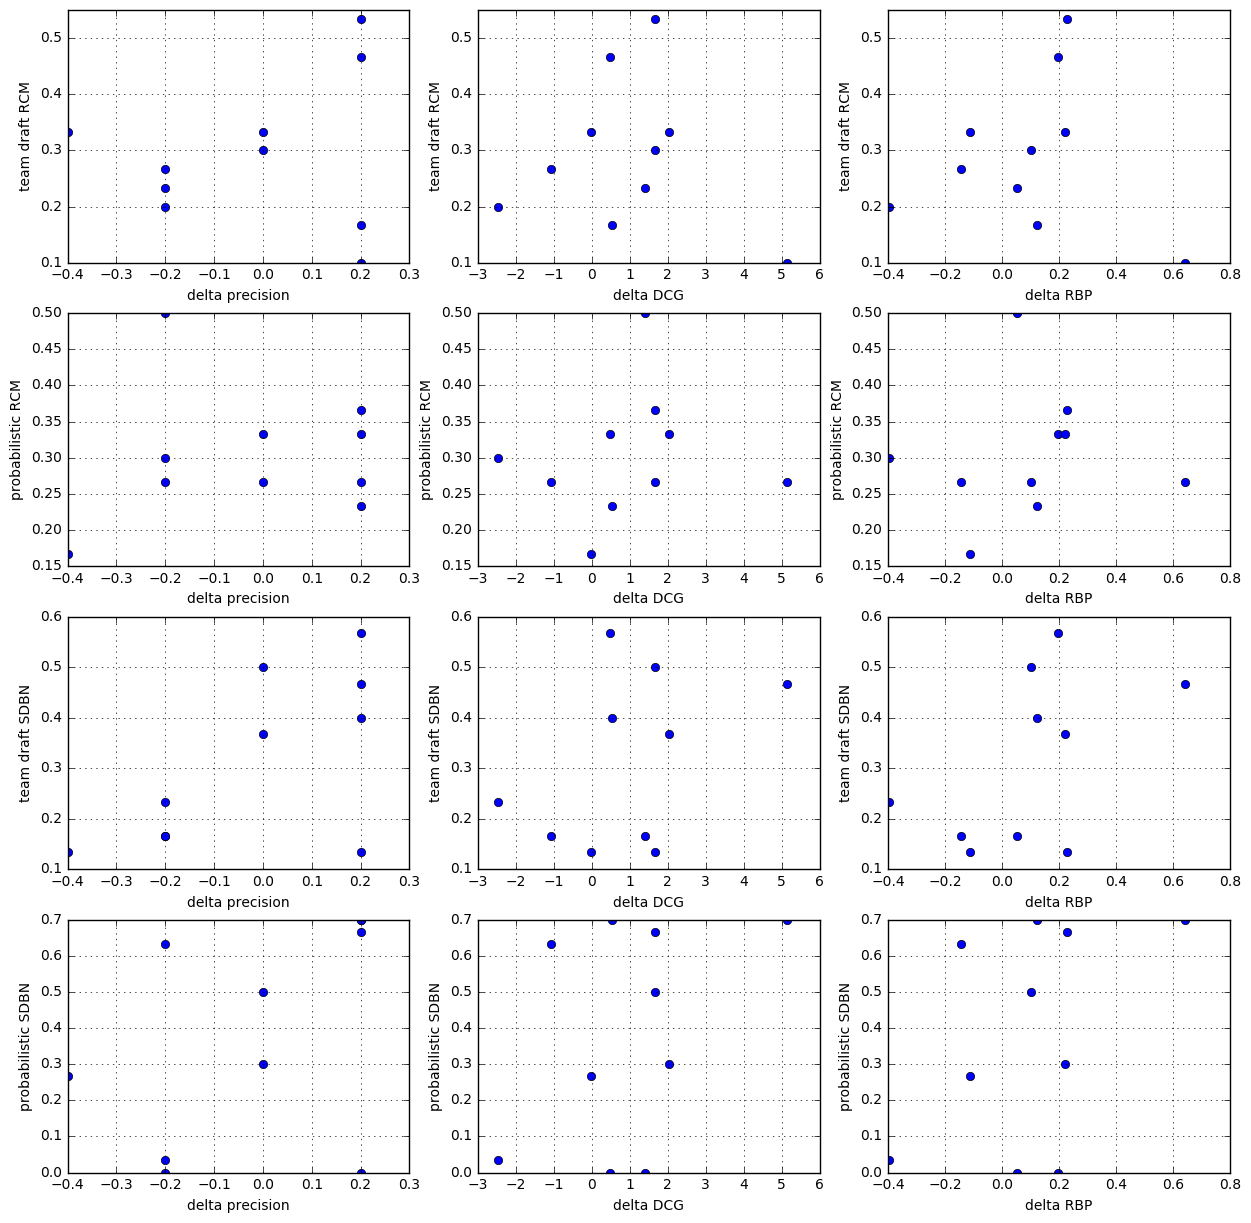

In [142]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.subplot(431)
plt.plot(prec_res, td_RCM_res, "bo")
plt.xlabel('delta precision')
plt.ylabel('team draft RCM')
plt.grid(True)

plt.subplot(432)
plt.plot(DCG_res, td_RCM_res, "bo")
plt.xlabel('delta DCG')
plt.ylabel('team draft RCM')
plt.grid(True)

plt.subplot(433)
plt.plot(RBP_res, td_RCM_res, "bo")
plt.xlabel('delta RBP')
plt.ylabel('team draft RCM')
plt.grid(True)

plt.subplot(434)
plt.plot(prec_res, prob_RCM_res, "bo")
plt.xlabel('delta precision')
plt.ylabel('probabilistic RCM')
plt.grid(True)

plt.subplot(435)
plt.plot(DCG_res, prob_RCM_res, "bo")
plt.xlabel('delta DCG')
plt.ylabel('probabilistic RCM')
plt.grid(True)

plt.subplot(436)
plt.plot(RBP_res, prob_RCM_res, "bo")
plt.xlabel('delta RBP')
plt.ylabel('probabilistic RCM')
plt.grid(True)

plt.subplot(437)
plt.plot(prec_res, td_SDBN_res, "bo")
plt.xlabel('delta precision')
plt.ylabel('team draft SDBN')
plt.grid(True)

plt.subplot(438)
plt.plot(DCG_res, td_SDBN_res, "bo")
plt.xlabel('delta DCG')
plt.ylabel('team draft SDBN')
plt.grid(True)

plt.subplot(439)
plt.plot(RBP_res, td_SDBN_res, "bo")
plt.xlabel('delta RBP')
plt.ylabel('team draft SDBN')
plt.grid(True)

plt.subplot(4,3,10)
plt.plot(prec_res, prob_SDBN_res, "bo")
plt.xlabel('delta precision')
plt.ylabel('probabilistic SDBN')
plt.grid(True)

plt.subplot(4,3,11)
plt.plot(DCG_res, prob_SDBN_res, "bo")
plt.xlabel('delta DCG')
plt.ylabel('probabilistic SDBN')
plt.grid(True)

plt.subplot(4,3,12)
plt.plot(RBP_res, prob_SDBN_res, "bo")
plt.xlabel('delta RBP')
plt.ylabel('probabilistic SDBN')
plt.grid(True)

fig.set_figheight(15)
fig.set_figwidth(15)

plt.show()

Specific Pair for Example

In [148]:
# Specific Example for explanation
example_pair = [([1,1,1,1,2],[2,2,1,0,2]),([2,2,2,2,2],[1,2,1,1,1]),([2,2,2,2,2],[0,0,1,1,1])]

# Offline
for i, elem in enumerate(example_pair):
    outperforms_prec,delta_prec= outperforms("precision",elem[0],elem[1],rank)
    outperforms_DCG,delta_DCG= outperforms("DCG",elem[0],elem[1],rank)
    outperforms_RBP,delta_RBP= outperforms("RBP",elem[0],elem[1],rank)
    print delta_prec, delta_DCG, delta_RBP
    
# Online, SDBN and RCM
N = 50.0

for i, elem in enumerate(example_pair):
    E_wins_proportion_td_SDBN = 0
    E_wins_proportion_prob_SDBN = 0
    tie_td_SDBN = 0
    tie_prob_SDBN = 0

    E_wins_proportion_td_RCM = 0
    E_wins_proportion_prob_RCM = 0
    tie_td_RCM = 0
    tie_prob_RCM = 0
    for _ in range(50):
        team_draft_res = team_draft_interleave(elem, False)
        prob_res = probabilistic_interleave(elem)
        doc_ids_draft = interleave_doc_ids(doc_ids_E,doc_ids_P,team_draft_res[0])
        doc_ids_prob = interleave_doc_ids(doc_ids_E,doc_ids_P,prob_res[0])
        clicks_td_SDBN = generate_click_SDBN(training_data, team_draft_res[1], query_test, doc_ids_draft)
        clicks_prob_SDBN = generate_click_SDBN(training_data, prob_res[1], query_test, doc_ids_prob)
        if(who_wins(team_draft_res[0], clicks_td_SDBN) == "E win"):
            E_wins_proportion_td_SDBN += 1
        elif(who_wins(team_draft_res[0], clicks_td_SDBN) == "tie"):
            tie_td_SDBN += 1
        if(who_wins(prob_res[0], clicks_prob_SDBN) == "E win"):
            E_wins_proportion_prob_SDBN += 1
        elif(who_wins(prob_res[0], clicks_prob_SDBN) == "tie"):
            tie_prob_SDBN += 1

        clicks_td_RCM = generate_click_RCM(training_data, team_draft_res[1])
        clicks_prob_RCM = generate_click_RCM(training_data, prob_res[1])
        if(who_wins(team_draft_res[0], clicks_td_RCM) == "E win"):
            E_wins_proportion_td_RCM += 1
        elif(who_wins(team_draft_res[0], clicks_td_RCM) == "tie"):
            tie_td_RCM += 1
        if(who_wins(prob_res[0], clicks_prob_RCM) == "E win"):
            E_wins_proportion_prob_RCM += 1
        elif(who_wins(prob_res[0], clicks_prob_RCM) == "tie"):
            tie_prob_RCM += 1

    print E_wins_proportion_td_SDBN / N
    print E_wins_proportion_prob_SDBN / N

    print E_wins_proportion_td_RCM / N
    print E_wins_proportion_prob_RCM / N

0.2 -2.83118294907 -0.2576
0.0 4.63505873062 0.51232
0.4 7.52784799133 1.03232
0.4
0.38
0.26
0.36
0.42
0.44
0.36
0.38
0.42
0.34
0.26
0.3


##### Summarized 

>TODO: Summarized



##### Analysis
In the specific code above, we have three specific example pair for explanation. We run the click model for 50 times to average out the randomness that is introduced by the interleaving method and the click model.

First pair wins on precision, lose on DCG and RBP, E win ratio is below 0.5 for every method.

Second pair ties on precision, wins on DCG and RBP, most of the time got, E win ratio is below 0.5 for every method.

Third pair wins on all measures, E win ratio is also below 0.5 for every method.

>TODO: draw some pairs (where measure(E)>measure(P) and Ewins < 0.5 for all kind of measure/interleaving/clickmodel) , run measure and click for them and compare results
>TODO: for the pairs that got different results, display measure + proba/click distribution and analyse
>TODO: try to test hypothesis: The difference is because of the satisfaction value (ie: doc_ids)
